# Analysis of CSR Expenditure and Demographics in India

This notebook presents an in-depth analysis of state expenditure and demographic factors in India. The dataset used contains information about the amount spent by various Indian states during the fiscal years 2019-2020, 2020-2021, and 2021-2022, along with population and poverty rate data. The goal of this analysis is to gain valuable insights into the CSR spending patterns of different states, explore correlations between spending and demographic factors, and identify trends and growth patterns. By examining this data, we aim to provide a comprehensive understanding of how fiscal decisions and demographics interplay in India's diverse regions.

## Imports

In [1]:
%%capture
pip install pandas numpy matplotlib seaborn ipywidgets scikit-learn openpyxl

In [24]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import ipywidgets as widgets
from IPython.display import display
from ipywidgets import interactive
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
# Set Seaborn style
sns.set(style="whitegrid")

## Load Data

In [3]:
excel_file_path = 'StateWiseView.xlsx'
data = pd.read_excel(excel_file_path, sheet_name=0)
data.head()

,State,Amount Spent FY 2019-2020 (INR Cr.),Amount Spent FY 2020-2021 (INR Cr.),Amount Spent FY 2021-2022 (INR Cr.),population,Poverty rate
0,Bihar,110.48,89.89,165.66,128500364,33.76
1,Jharkhand,155.21,226.54,192.41,40100376,28.81
2,Meghalaya,17.65,17.63,19.30,3772103,27.79
3,Uttar Pradesh,577.98,907.32,1321.36,231502578,22.93
4,Madhya Pradesh,220.46,375.51,420.04,85002417,20.63


In [4]:
# Descriptive Statistics
# Calculate basic statistics for numeric columns
desc_stats = data.describe()
desc_stats

,Amount Spent FY 2019-2020 (INR Cr.),Amount Spent FY 2020-2021 (INR Cr.),Amount Spent FY 2021-2022 (INR Cr.),population,Poverty rate
count,37.000000,37.000000,37.000000,3.700000e+01,37.000000
mean,372.121081,398.517838,511.121351,3.864976e+07,10.454865
std,623.060198,652.685574,932.869180,5.022521e+07,8.361965
min,0.000000,0.000000,0.450000,6.600100e+04,0.550000
25%,14.210000,12.430000,15.910000,1.646050e+06,4.750000
50%,124.700000,158.460000,177.480000,1.930110e+07,8.100000
75%,537.910000,578.160000,652.010000,6.959976e+07,15.310000
max,3353.240000,3464.810000,5229.310000,2.315026e+08,33.760000


## Exploratory Data Analysis

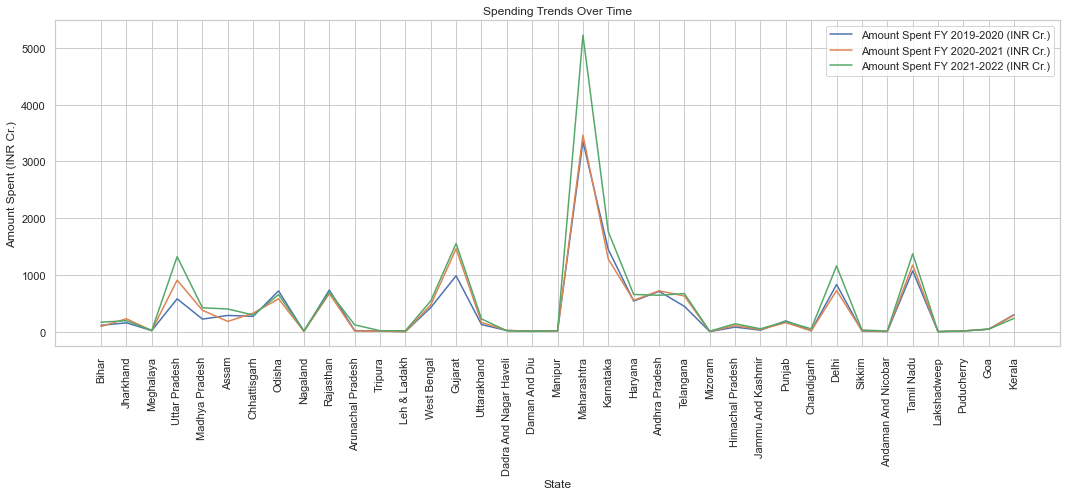

In [18]:
# Comparative Analysis - Spending patterns over the years
# Create a line plot to visualize spending trends for each state over time
plt.figure(figsize=(18, 6))
for col in data.columns[1:4]:  # Columns with spending data
    sns.lineplot(data=data, x='State', y=col, label=col)
plt.title('Spending Trends Over Time')
plt.xlabel('State')
plt.ylabel('Amount Spent (INR Cr.)')
plt.xticks(rotation=90)
plt.legend()
plt.show()

In [19]:
# Sort the data by poverty rate in descending order
sorted_data = data.sort_values(by='Poverty rate', ascending=False)

# Get the top 5 states with the highest poverty rates
top_5_states = sorted_data.head(5)

# Extract the columns for expenditures per year
expenditure_columns = ['Amount Spent FY 2019-2020 (INR Cr.)', 'Amount Spent FY 2020-2021 (INR Cr.)', 'Amount Spent FY 2021-2022 (INR Cr.)']

# Create a DataFrame with the top 5 states and their corresponding expenditures for each year
result_df = top_5_states[['State', 'Poverty rate'] + expenditure_columns]

# Display the DataFrame
result_df

,State,Poverty rate,Amount Spent FY 2019-2020 (INR Cr.),Amount Spent FY 2020-2021 (INR Cr.),Amount Spent FY 2021-2022 (INR Cr.)
0,Bihar,33.76,110.48,89.89,165.66
1,Jharkhand,28.81,155.21,226.54,192.41
2,Meghalaya,27.79,17.65,17.63,19.30
3,Uttar Pradesh,22.93,577.98,907.32,1321.36
4,Madhya Pradesh,20.63,220.46,375.51,420.04


In [20]:
# Calculate the correlation between Population and Spending (FY 2021-2022)
population_spending_corr = data['population'].corr(data['Amount Spent FY 2021-2022 (INR Cr.)'])

# Calculate the correlation between Poverty Rate and Spending (FY 2021-2022)
poverty_rate_spending_corr = data['Poverty rate'].corr(data['Amount Spent FY 2021-2022 (INR Cr.)'])

print(f"Correlation between Population and Spending (FY 2021-2022): {population_spending_corr:.2f}")
print(f"Correlation between Poverty Rate and Spending (FY 2021-2022): {poverty_rate_spending_corr:.2f}")

Correlation between Population and Spending (FY 2021-2022): 0.56
Correlation between Poverty Rate and Spending (FY 2021-2022): -0.03


In [21]:
# Create a widget to select the year
year_selector = widgets.Dropdown(
    options=['2019-2020', '2020-2021', '2021-2022'],
    value='2021-2022',
    description='Select Year:',
)

# Function to update and display the linear regression chart
def update_chart(selected_year):
    # Extract CSR spending and population for the selected year
    csr_spending = data[f'Amount Spent FY {selected_year} (INR Cr.)']
    population = data['Poverty rate']

    # Reshape the data for Linear Regression
    csr_spending = csr_spending.values.reshape(-1, 1)
    population = population.values.reshape(-1, 1)

    # Create a Linear Regression model
    model = LinearRegression()
    model.fit(population, csr_spending)

    # Make predictions using the model
    predictions = model.predict(population)

    # Create a scatter plot of the data points
    plt.figure(figsize=(20, 6))
    plt.scatter(population, csr_spending, color='blue', label='Data Points')

    # Plot the regression line
    plt.plot(population, predictions, color='red', linewidth=2, label='Linear Regression')

    # Customize the plot
    plt.title(f'Linear Regression: CSR Spending vs. Poverty rate ({selected_year})', fontsize=16)
    plt.xlabel('Poverty rate %')
    plt.ylabel(f'CSR Spending {selected_year} (INR Cr.)')
    plt.legend()
    plt.grid(True)

    # Show the plot
    plt.show()

# Create an interactive widget that updates the chart
interactive_plot = interactive(update_chart, selected_year=year_selector)

# Display the interactive widget
display(interactive_plot)

interactive(children=(Dropdown(description='Select Year:', index=2, options=('2019-2020', '2020-2021', '2021-2…

In [22]:
# Create a widget to select the year
year_selector = widgets.Dropdown(
    options=['2019-2020', '2020-2021', '2021-2022'],
    value='2021-2022',
    description='Select Year:',
)

# Function to update and display the linear regression chart
def update_chart(selected_year):
    # Extract CSR spending and population for the selected year
    csr_spending = data[f'Amount Spent FY {selected_year} (INR Cr.)']
    population = data['population']

    # Reshape the data for Linear Regression
    csr_spending = csr_spending.values.reshape(-1, 1)
    population = population.values.reshape(-1, 1)

    # Create a Linear Regression model
    model = LinearRegression()
    model.fit(population, csr_spending)

    # Make predictions using the model
    predictions = model.predict(population)

    # Create a scatter plot of the data points
    plt.figure(figsize=(20, 6))
    plt.scatter(population, csr_spending, color='blue', label='Data Points')

    # Plot the regression line
    plt.plot(population, predictions, color='red', linewidth=2, label='Linear Regression')

    # Customize the plot
    plt.title(f'Linear Regression: CSR Spending vs. Population ({selected_year})', fontsize=16)
    plt.xlabel('Population (Million)')
    plt.ylabel(f'CSR Spending {selected_year} (INR Cr.)')
    plt.legend()
    plt.grid(True)
    
    # Format the x-axis labels to display population in millions
    plt.gca().xaxis.set_major_formatter(mtick.FuncFormatter(lambda x, _: f'{x/1e6:.0f} M'))

    # Show the plot
    plt.show()

# Create an interactive widget that updates the chart
interactive_plot = interactive(update_chart, selected_year=year_selector)

# Display the interactive widget
display(interactive_plot)

interactive(children=(Dropdown(description='Select Year:', index=2, options=('2019-2020', '2020-2021', '2021-2…